In [77]:
# This is an attempt to reconstruct some of the networks and results from the
# original paper (Adversarial Autoencoders, Makhzani et. al)
import argparse
import os
import torch
import time
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.utils as vutils
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.nn import functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
#import torch.distributions as D
from torch import distributions
from torchvision import models
from math import pi, sin, cos  

In [78]:
def mixedGaussianCircular(k=10, sigma=0.35, rho=0.75, j=0):
    """
    Sample from a mixture of k 2d-gaussians. All have equal variance (sigma) and
    correlation coefficient (rho), with the means equally distributed on the
    unit circle.
    """
    #cat = distributions.Categorical(torch.ones(k))
    #i = cat.sample().item()
    #theta = 2 * torch.pi * i / k
    theta = 2 * torch.pi / k
    v = torch.Tensor((1, 0))
    T = torch.Tensor([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])
    S = torch.stack([T.matrix_power(i) for i in range(k)])
    mu = S @ v
    cov = sigma ** 2 * ( torch.eye(2) + rho * (torch.ones(2, 2) - torch.eye(2)))
    #cov = cov @ S
    cov = torch.eye(2) * sigma ** 2
    cov[1,1] = sigma ** 2 * rho
    cov = torch.stack(
            [T.matrix_power(i+j) @ cov @ T.matrix_power(-i-j) for i in range(k)])
    gauss = distributions.MultivariateNormal(loc = mu, covariance_matrix= cov)
    return gauss


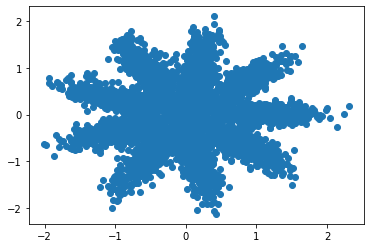

In [79]:
gauss = mixedGaussianCircular(rho=0.1, sigma=0.4, k=9, j=0)
samples = gauss.sample((500,))
x = samples[:,:,0].flatten()
y = samples[:,:,1].flatten()
plt.scatter(x,y)


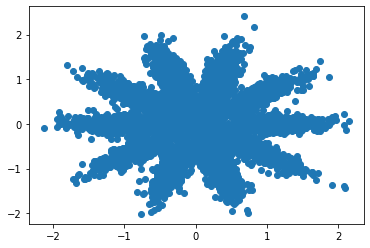

In [85]:
k=10
gauss = mixedGaussianCircular(rho=0.075, sigma=0.4, k=k, j=0)

mix = distributions.Categorical(torch.ones(k,))

comp = distributions.Independent(gauss, 0)
comp.event_shape
comp.batch_shape
gmm = distributions.MixtureSameFamily(mix, comp)

samples = gmm.sample((5000,))
x = samples[:,0].flatten()
y = samples[:,1].flatten()
plt.scatter(x,y)
